Name:- Wagh Aryan Anil
Task/Project No:- Task No.3
Objective:- car Price Prediction Using Machine Learning (Used Cars) (Oasis Infobyte Intership)

In [238]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [124]:
car = pd.read_csv(r"C:\Users\sai\Documents\car_data.csv")
car


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [125]:
print('Selling Type:-')
print(car['Selling_type'].unique())
print('Fuel Type:-')
print(car['Fuel_Type'].unique())
print('Transmission Type:-')
print(car['Transmission'].unique())
print('previous owner:-')
print(car['Owner'].unique())

Selling Type:-
['Dealer' 'Individual']
Fuel Type:-
['Petrol' 'Diesel' 'CNG']
Transmission Type:-
['Manual' 'Automatic']
previous owner:-
[0 1 3]


In [126]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [127]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [128]:
car["Year"]= pd.to_datetime(car["Year"], format = '%Y').dt.year

In [129]:
car["Owner"] = car["Owner"].astype("int32")
car["Driven_kms"] = car["Driven_kms"].astype("int32")

In [130]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int32  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int32  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 17.8+ KB


In [131]:
print("car Years:-")
car["Year"].unique()


car Years:-


array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [133]:
print("car Year Unique:-")
car["Year"].nunique()

car Year Unique:-


16

In [138]:
car = car.drop(columns= "Car_Name")

In [145]:
car["current year"]= 2023

In [147]:
car['Age of car']= car["current year"]-car["Year"]

In [79]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,current year,Age of car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2023,7
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2023,8
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2023,14
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2023,6


In [81]:
car = car.drop(columns= ["current year", "Year"])
car

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age of car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [83]:
car = pd.get_dummies(data=car,  drop_first= True)

In [85]:
car

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,True,False,False,True
297,4.00,5.90,60000,0,8,False,True,False,True
298,3.35,11.00,87934,0,14,False,True,False,True
299,11.50,12.50,9000,0,6,True,False,False,True


In [99]:
g= ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']
car[g]= car[g].astype('int')
car.head(50)

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
5,9.25,9.83,2071,0,5,1,0,0,1
6,6.75,8.12,18796,0,8,0,1,0,1
7,6.50,8.61,33429,0,8,1,0,0,1
8,8.75,8.89,20273,0,7,1,0,0,1
9,7.45,8.92,42367,0,8,1,0,0,1


In [101]:
car.corr()

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876305,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876305,1.000000,0.205224,0.009948,0.053167,0.464934,-0.456829,-0.511779,-0.334326
Driven_kms,0.028566,0.205224,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009948,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Age of car,-0.234369,0.053167,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464934,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456829,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Selling_type_Individual,-0.553851,-0.511779,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334326,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


In [105]:
y = car['Selling_Price']
x = car.drop(columns= ['Selling_Price']) 

In [113]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


In [155]:
x

,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1
297,5.90,60000,0,8,0,1,0,1
298,11.00,87934,0,14,0,1,0,1
299,12.50,9000,0,6,1,0,0,1


In [181]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [183]:
x_train.shape

(239, 8)

In [185]:
x_test.shape

(60, 8)

In [187]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [195]:
y_prediction = regressor.predict(x_test)

In [199]:
print(y_prediction)

[ 6.042   5.1125  3.2345  4.8095  4.8495  0.7322  2.585   6.189   7.4865
  0.4171  3.634   1.1796  6.146   4.1254  4.9976  1.1914  8.122   3.52
  0.4396 20.4458 16.5981  5.51    0.2099  0.9226  0.4295  2.9265 17.6036
  1.168   5.1125  7.9684  4.164   5.2     1.5131  2.3815  2.343   6.905
  0.2477  4.216   0.3509  0.8256  0.4844  1.169   3.0517  5.335   0.729
  0.8176  5.8855  6.4545  0.7787  5.104   9.0725  4.3385  9.6525  9.7336
  6.1195  2.1265  0.4304  2.894   2.4265  6.908 ]


In [207]:
r2_score(y_test, y_prediction)


0.9384571956724003

In [215]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],  # Use valid criterion values
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [217]:
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=parameters, n_iter=10, 
                               scoring ='neg_mean_absolute_error',random_state=42, cv=5, verbose=2, n_jobs=-1)

In [219]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [221]:
random_cv.best_score_

-0.8531441049585637

In [223]:
predictions=random_cv.predict(x_test)

<Axes: xlabel='Selling_Price', ylabel='Density'>

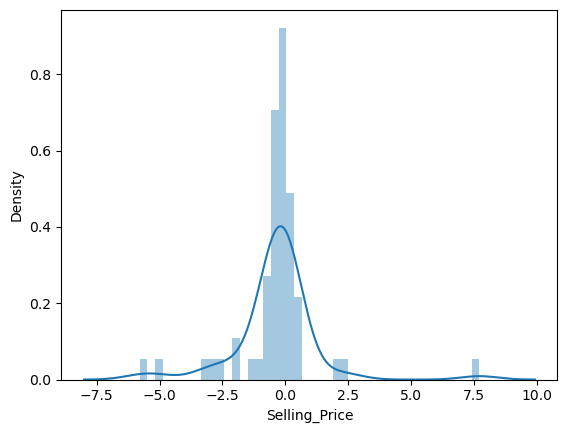

In [225]:
sns.distplot(y_test-predictions)

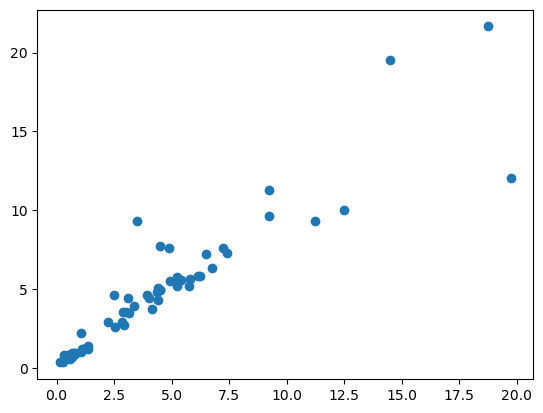

In [228]:
plt.scatter(y_test, predictions)

In [230]:
x.head(3)

,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1


In [232]:
single_ob = np.array([9.5, 15000, 0.0, 5.0, 1.0, 0.0, 0.0, 1.0])
single_ob = single_ob.reshape(1, -1)

In [234]:
regressor.predict(single_ob)

array([8.853])

In [236]:
car.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,current year,Age of car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [240]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8756355108991991
MSE: 2.8838118283087155
RMSE: 1.6981789741687168
